In [18]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [19]:
df=pd.read_csv('D://abhijith//internship1//DATASETS//spam.csv', encoding='latin-1')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.rename(columns={'v1': 'label', 'v2': 'sms'}, inplace=True)

print(df.isnull().sum(),"\n")

label    0
sms      0
dtype: int64 



In [20]:
# df= df.drop_duplicates()
# print(df.shape)
# print(df.describe())
# duplicate_count = df['sms'].duplicated().sum()
# print(duplicate_count)

print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

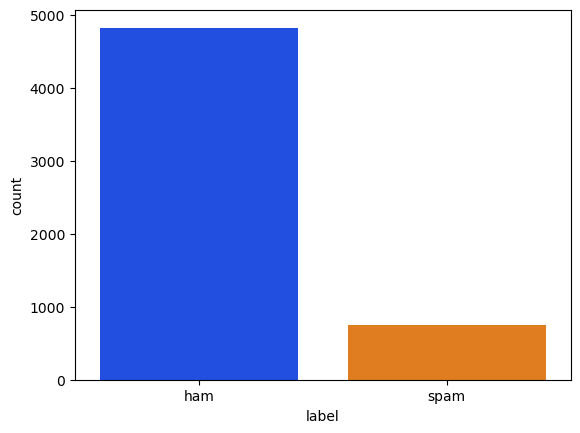

In [21]:
sns.countplot(x="label", data=df, palette="bright", hue="label", legend=False)

In [22]:
duplicate_count = df['sms'].duplicated().sum()
print(duplicate_count)

# df= df.drop_duplicates(subset='sms', keep='first') 
print(duplicate_count)

403
403


In [24]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])  # spam = 1, ham = 0
print(df.head)

tfidf = TfidfVectorizer(max_features=5000,stop_words='english')  
X = tfidf.fit_transform(df['sms'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<bound method NDFrame.head of       label                                                sms
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567      1  This is the 2nd time we have tried 2 contact u...
5568      0              Will Ì_ b going to esplanade fr home?
5569      0  Pity, * was in mood for that. So...any other s...
5570      0  The guy did some bitching but I acted like i'd...
5571      0                         Rofl. Its true to its name

[5572 rows x 2 columns]>


In [25]:
model=RandomForestClassifier(n_estimators=40,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# print(y_pred)
acc=accuracy_score(y_test,y_pred)
print("Accuracy: ",round(acc,3)*100,"%")

Accuracy:  97.8 %


[[964   1]
 [ 23 127]]


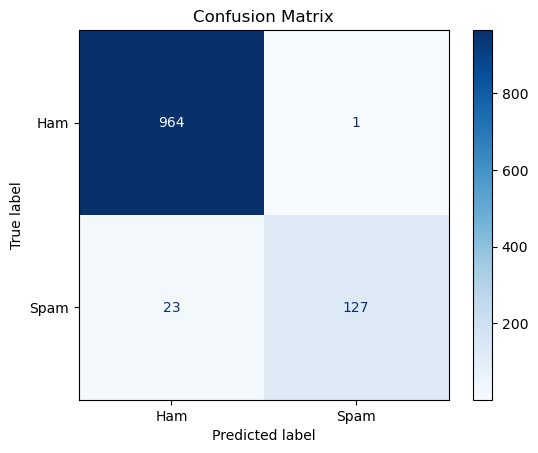

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, labels=["Ham", "Spam"]):
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

# Example usage
# y_true = [actual labels]; y_pred = model.predict(X_test)
plot_confusion_matrix(y_test, y_pred)

In [27]:
a=tfidf.transform([input("Paste the mail")])
pred=model.predict(a)

if pred==[1]:
    print("Mail is Spam!")
else:
    print("Mail is Ham!")
    

Paste the mail edwed


Mail is Ham!
